# 문제 1
- 저울
- https://www.acmicpc.net/problem/2437

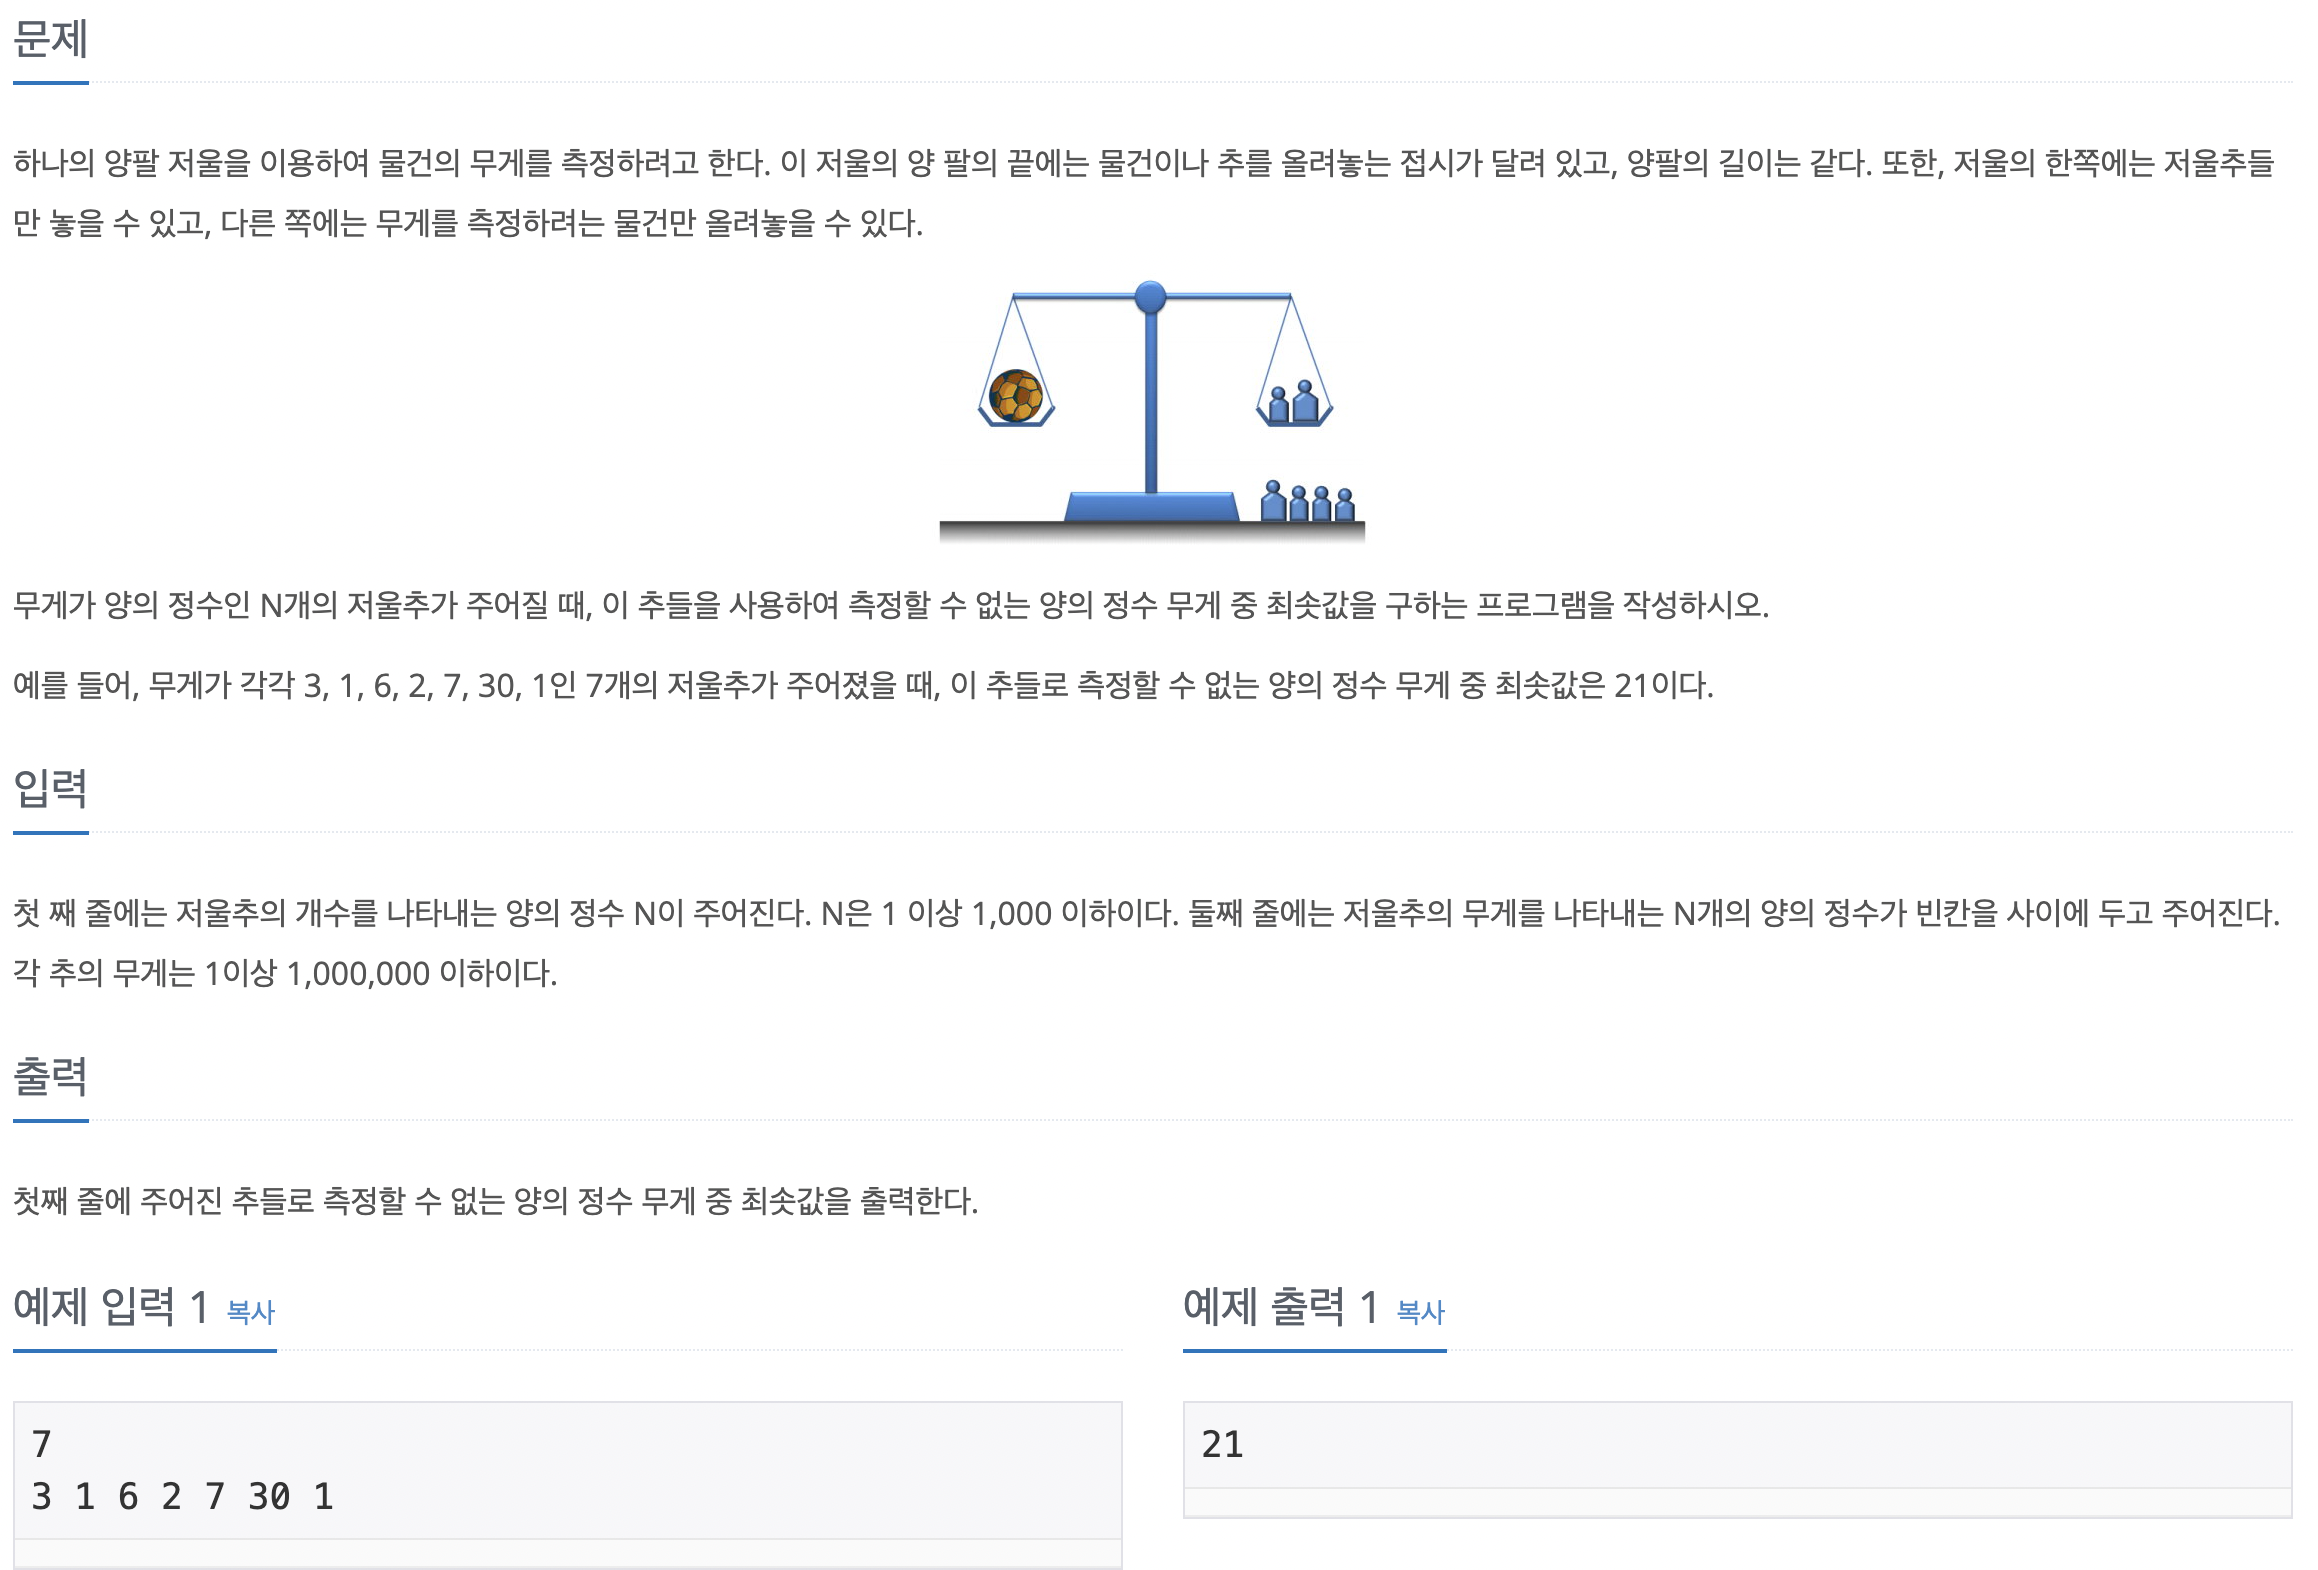

## Step
- 무식하게 생각한다면, 전체 추에서 2개, 3개, 4개씩 조합해가며 정수를 만들 수 있는지 기록해 나가면 된다
- 시간초과에 걸릴거 같음

#### 아니나 다를까 시간초과

In [90]:
from itertools import combinations

N = int(input())
cn = list(map(int, input().split()))

res = [0]
for i in range(1,N+1):
    tmp = list(combinations(cn,i))
    for each in tmp:
        each_sum = sum(each)
        if each_sum not in res:
            res.append(each_sum)

res.sort()
for i,num in enumerate(res):
    if i != num:
        print(i)
        break

7
3 1 6 2 7 30 1
21


## 정답코드

- https://aerocode.net/392
- 해설 참고

In [175]:
N = int(input())
weight_list = sorted(list(map(int, input().split())))
m_sum = 1

for i in range(N):
    if m_sum < weight_list[i]:
        break
    m_sum += weight_list[i]
    # print(m_sum)
print(m_sum)

4
1 1 2 6
2
3
5


In [92]:
weight_list

[1, 1, 2, 3, 6, 7, 30]

# 문제 2
- A -> B
- https://www.acmicpc.net/problem/16953

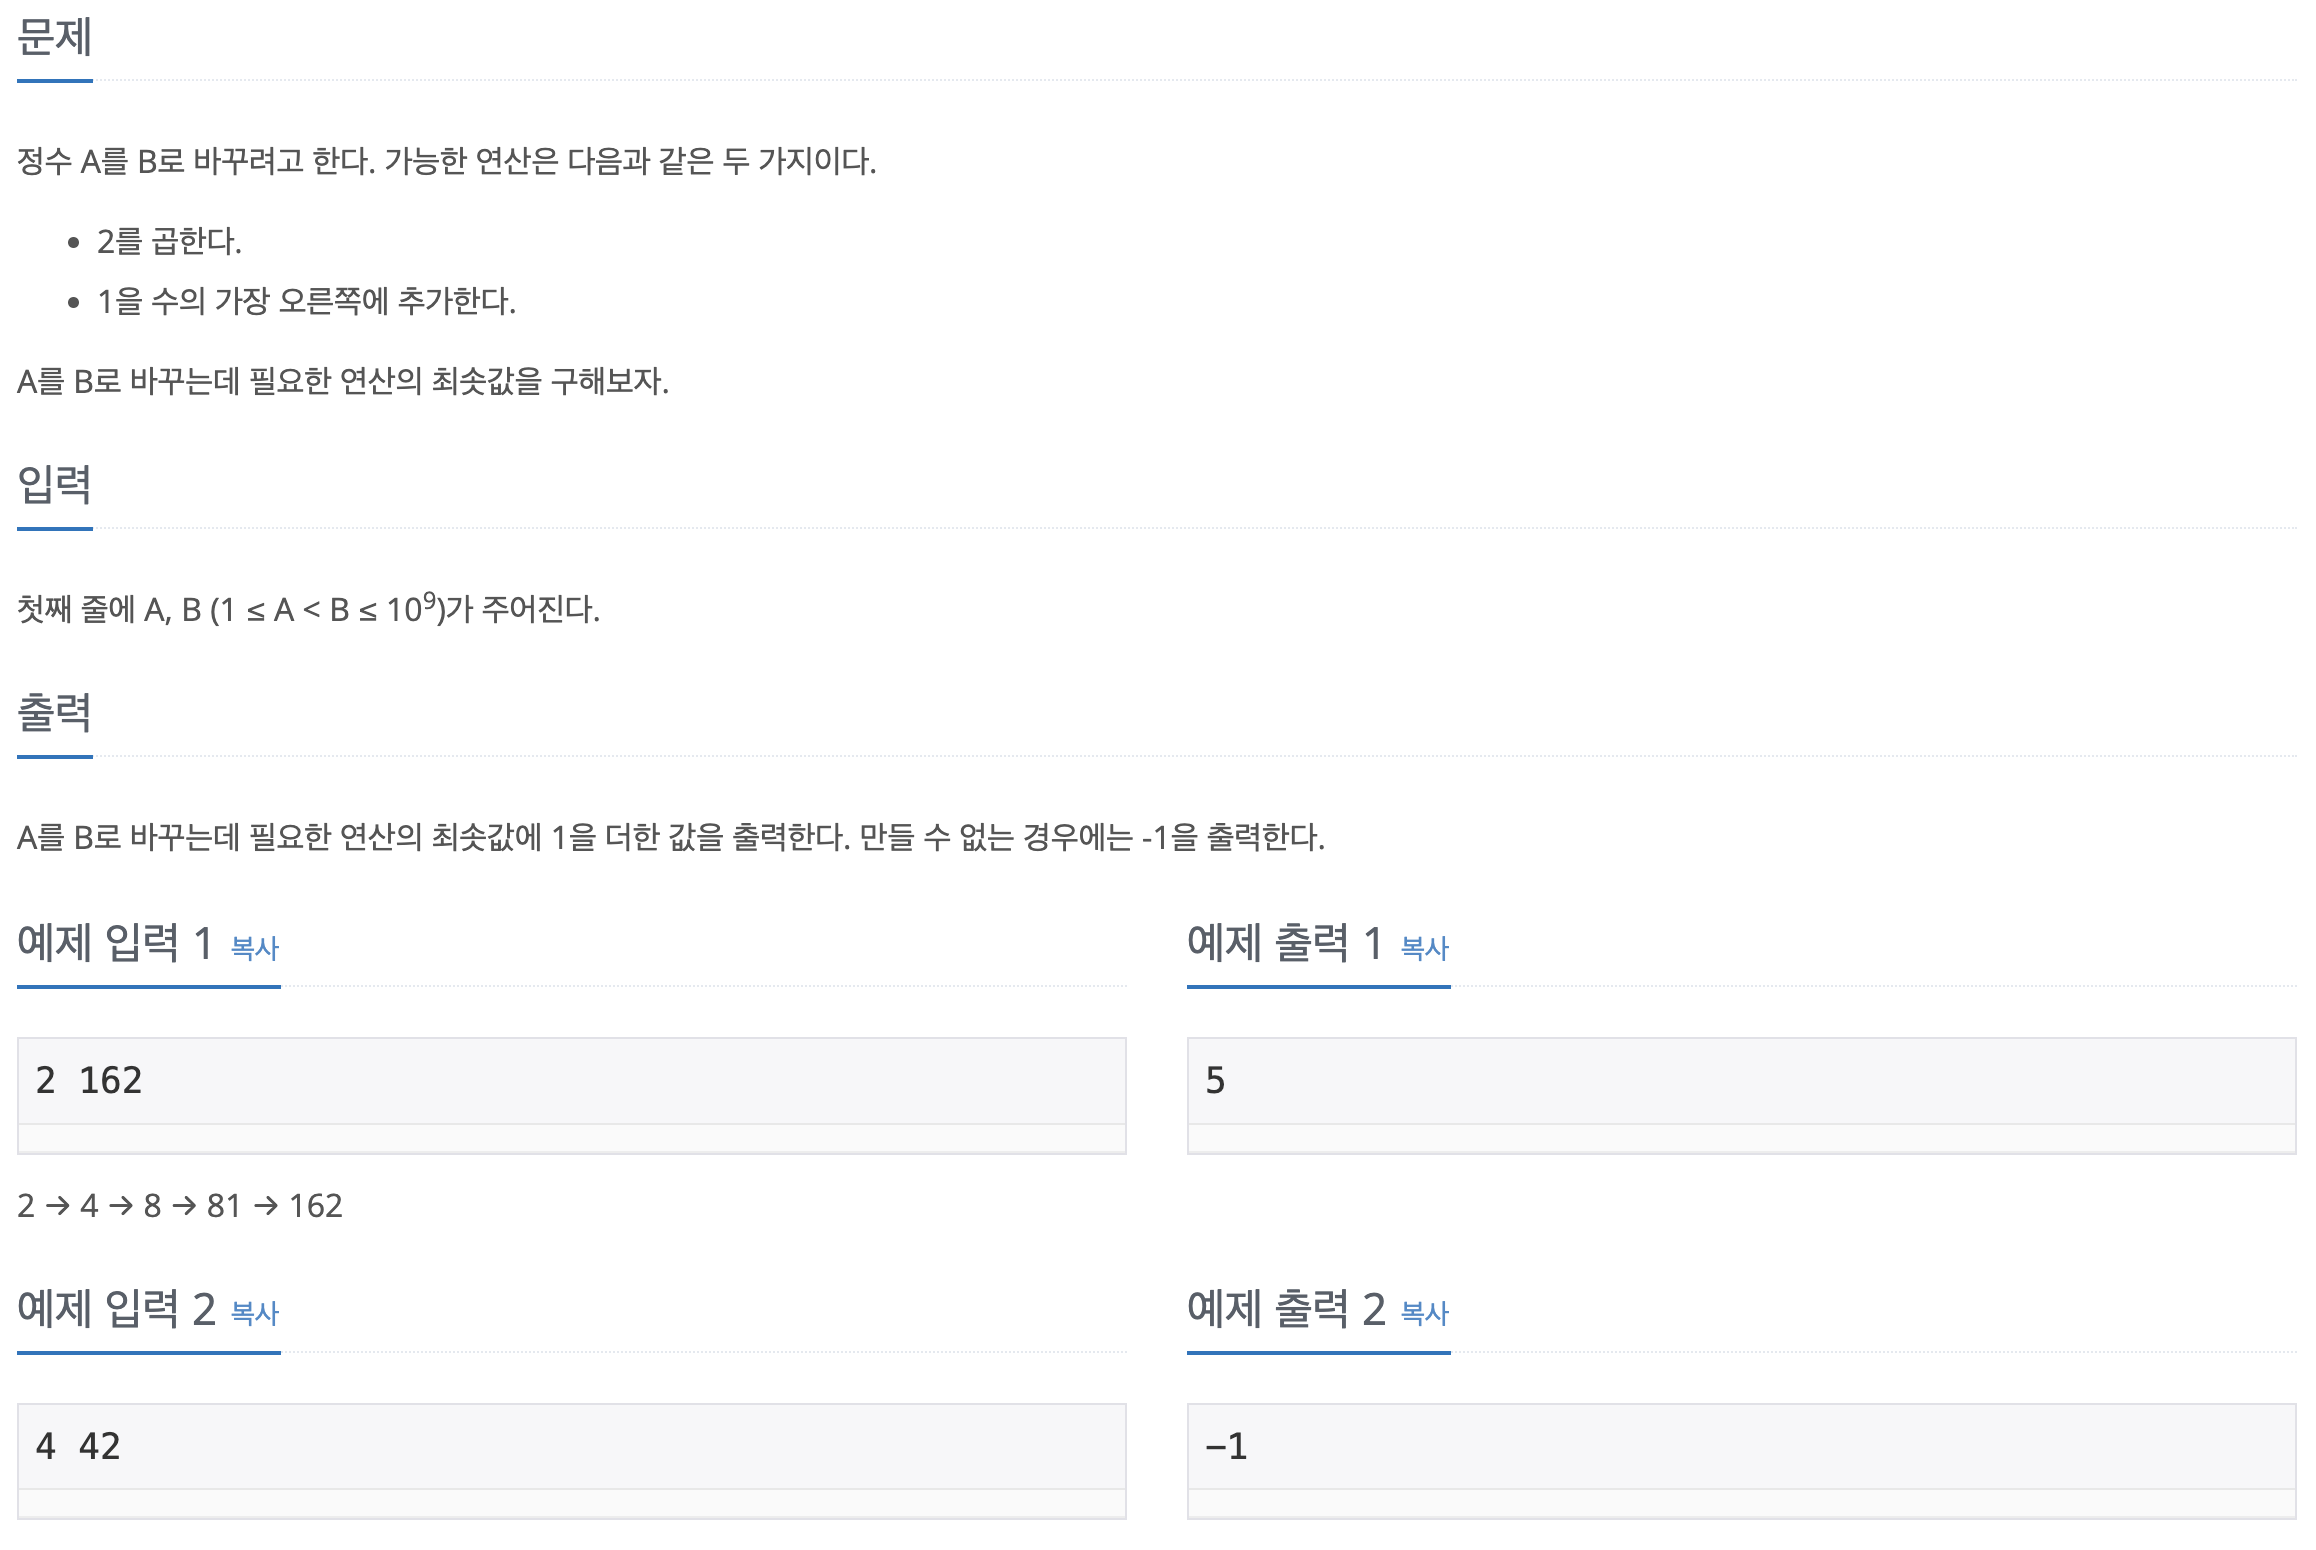

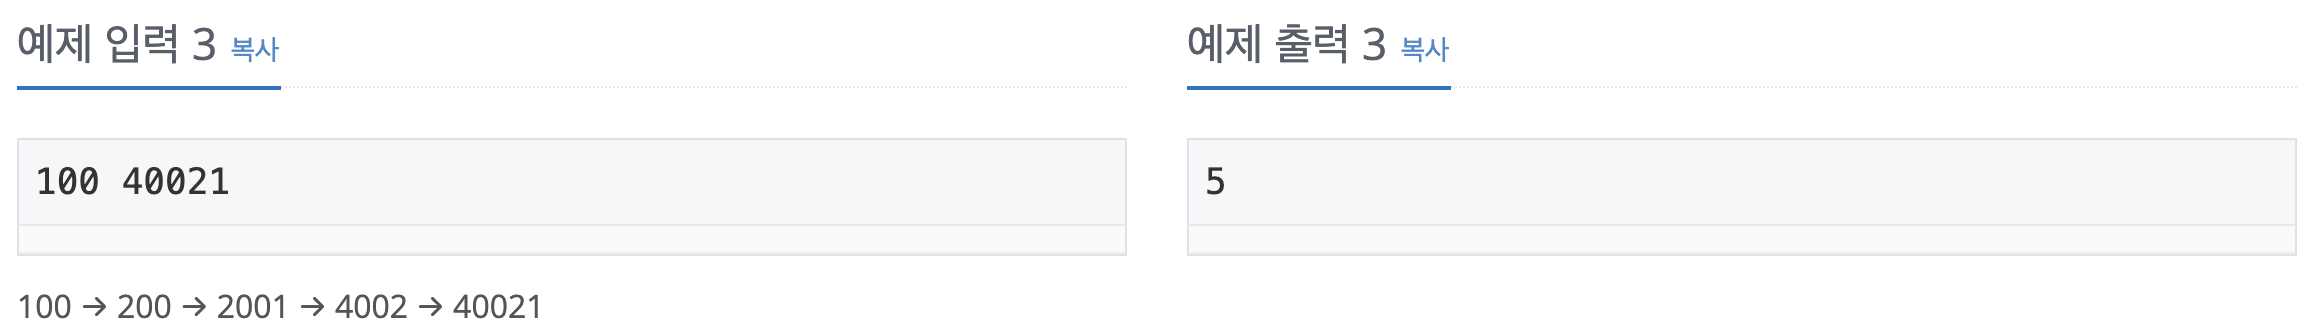

In [66]:
A,B = map(int, input().split())

ans = [[] for _ in range(31)]   ## 이 부분에서 빈 리스트를 몇개 만들어주느냐에 따라서 Index Error가 나고, 안나고 결정
                                ## 30까지는 오류, 31부터 통과 -- 1 -> 1e9까지 만들어 내는데 30번의 반복을 이뤄야 함 
ans[0].append(A)
i = 0

while True:
    for item in ans[i]:
        tmp1 = item*2 
        tmp2 = item*10 + 1
        if tmp1 <= B:
            ans[i+1].append(tmp1)
        if tmp2 <= B:
            ans[i+1].append(tmp2)
    
    if B in ans[i+1]:
        print(i+2)
        break
        
    if not ans[i+1]:
        print(-1)
        break
        
    i += 1   
    #print(ans)

1 1000000000
-1


In [72]:
print(2**29 > 1e9)
print(2**30 > 1e9)

False
True


# 문제 3
- 빵집
- https://www.acmicpc.net/problem/3109

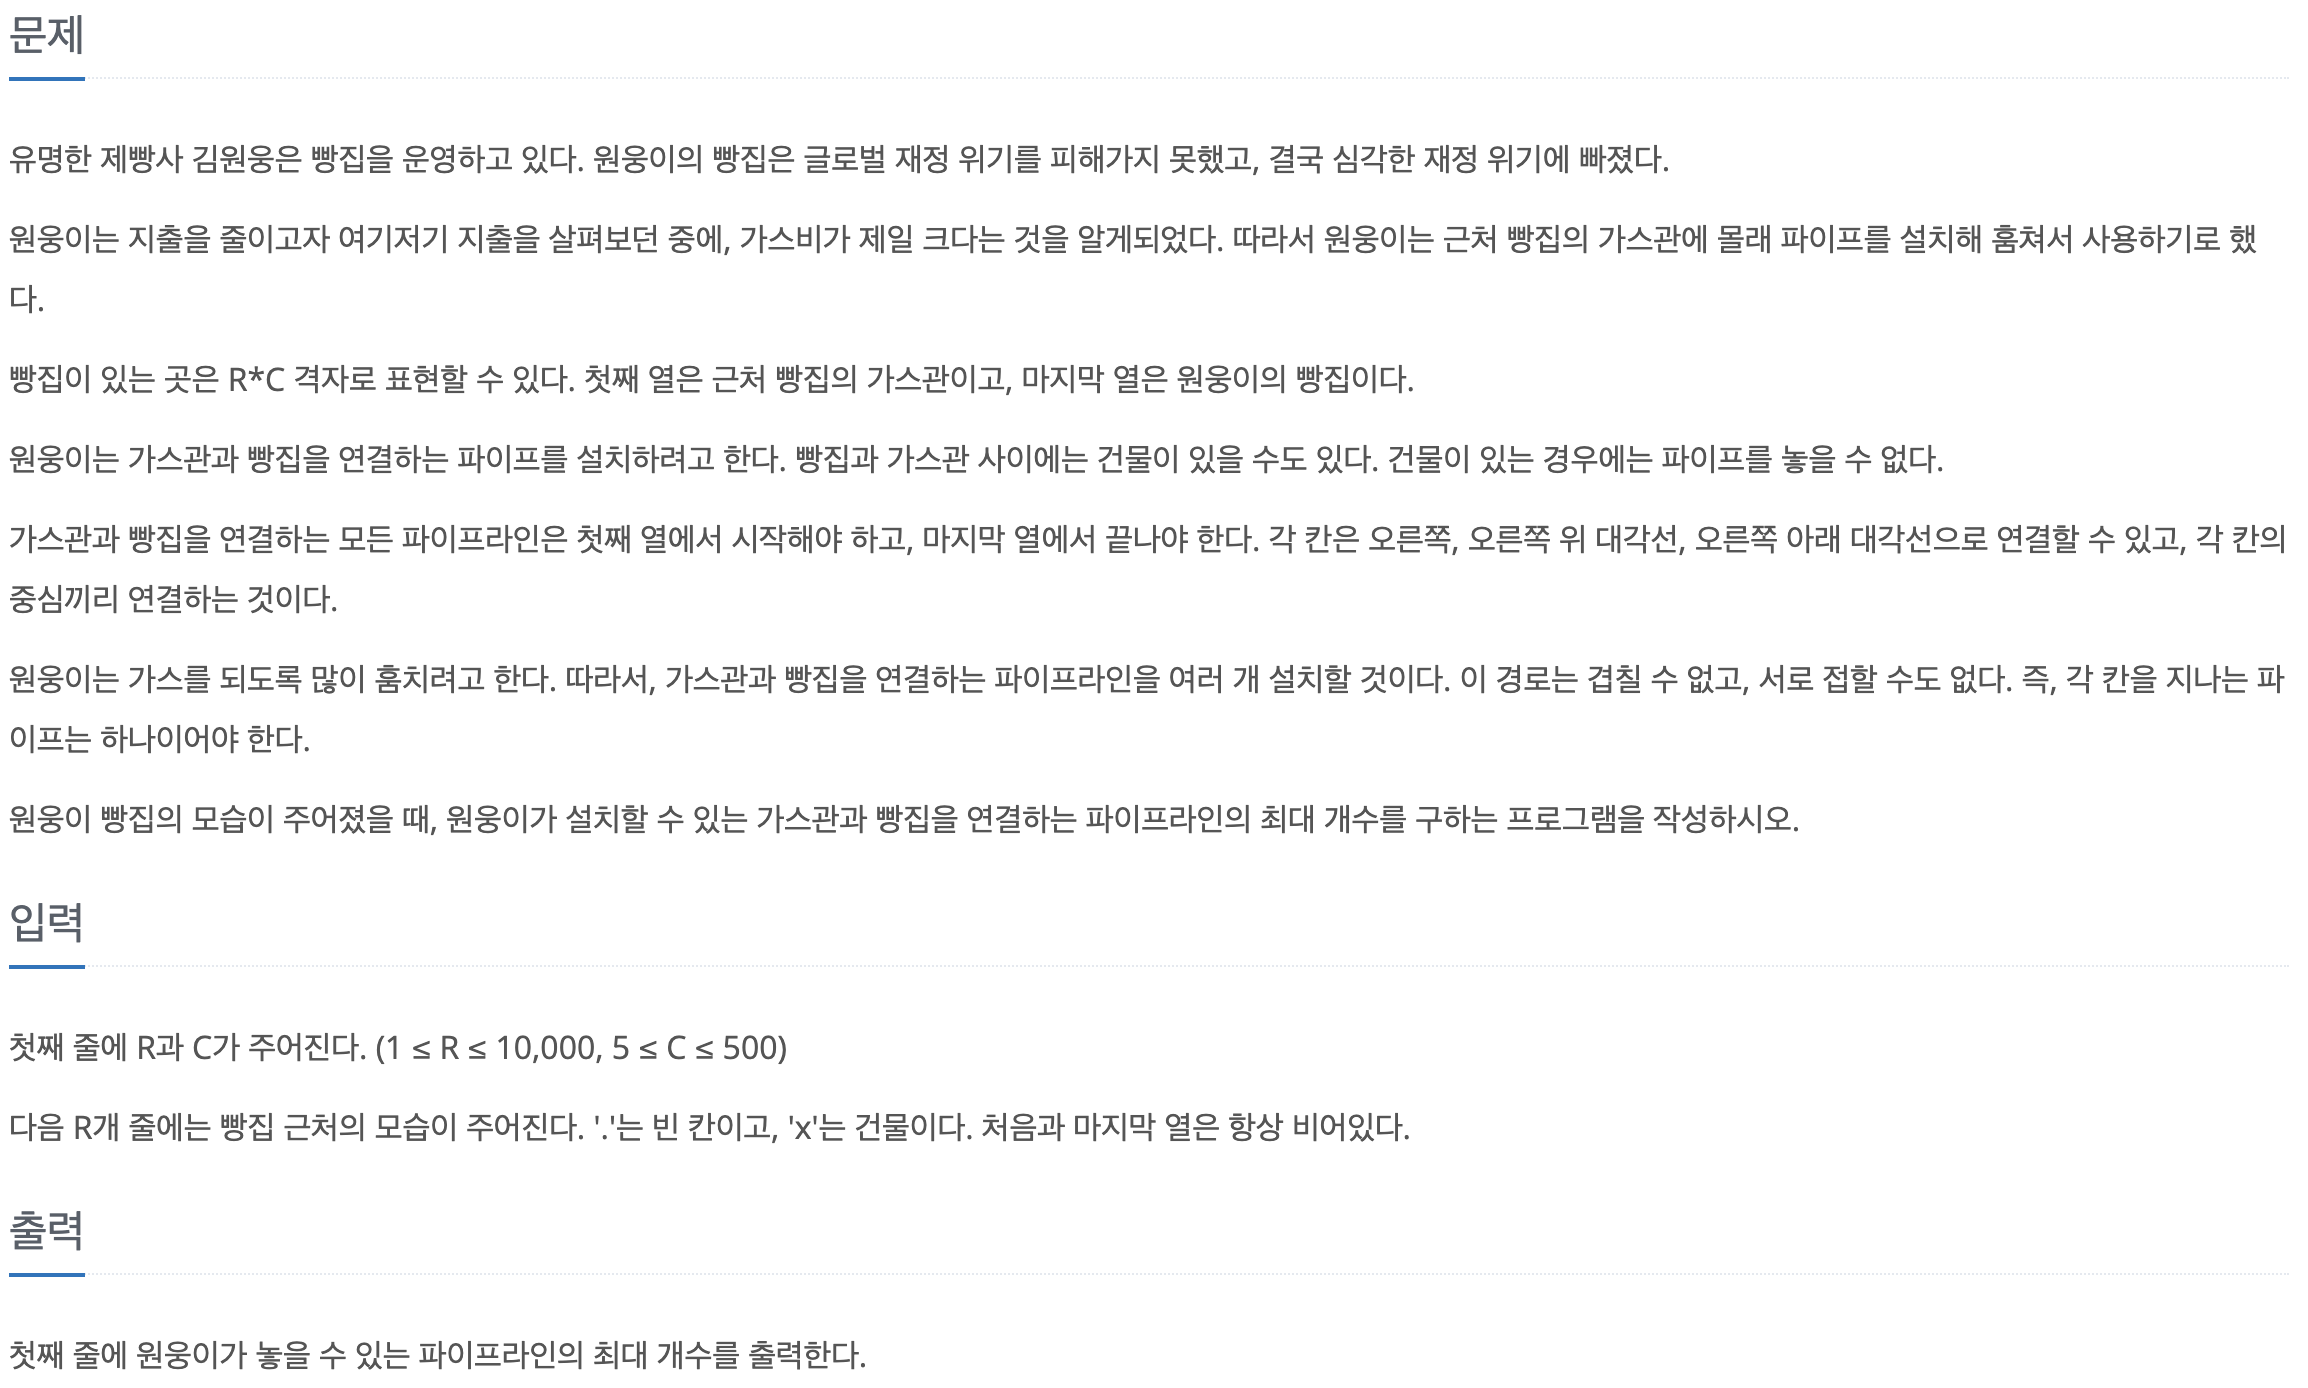

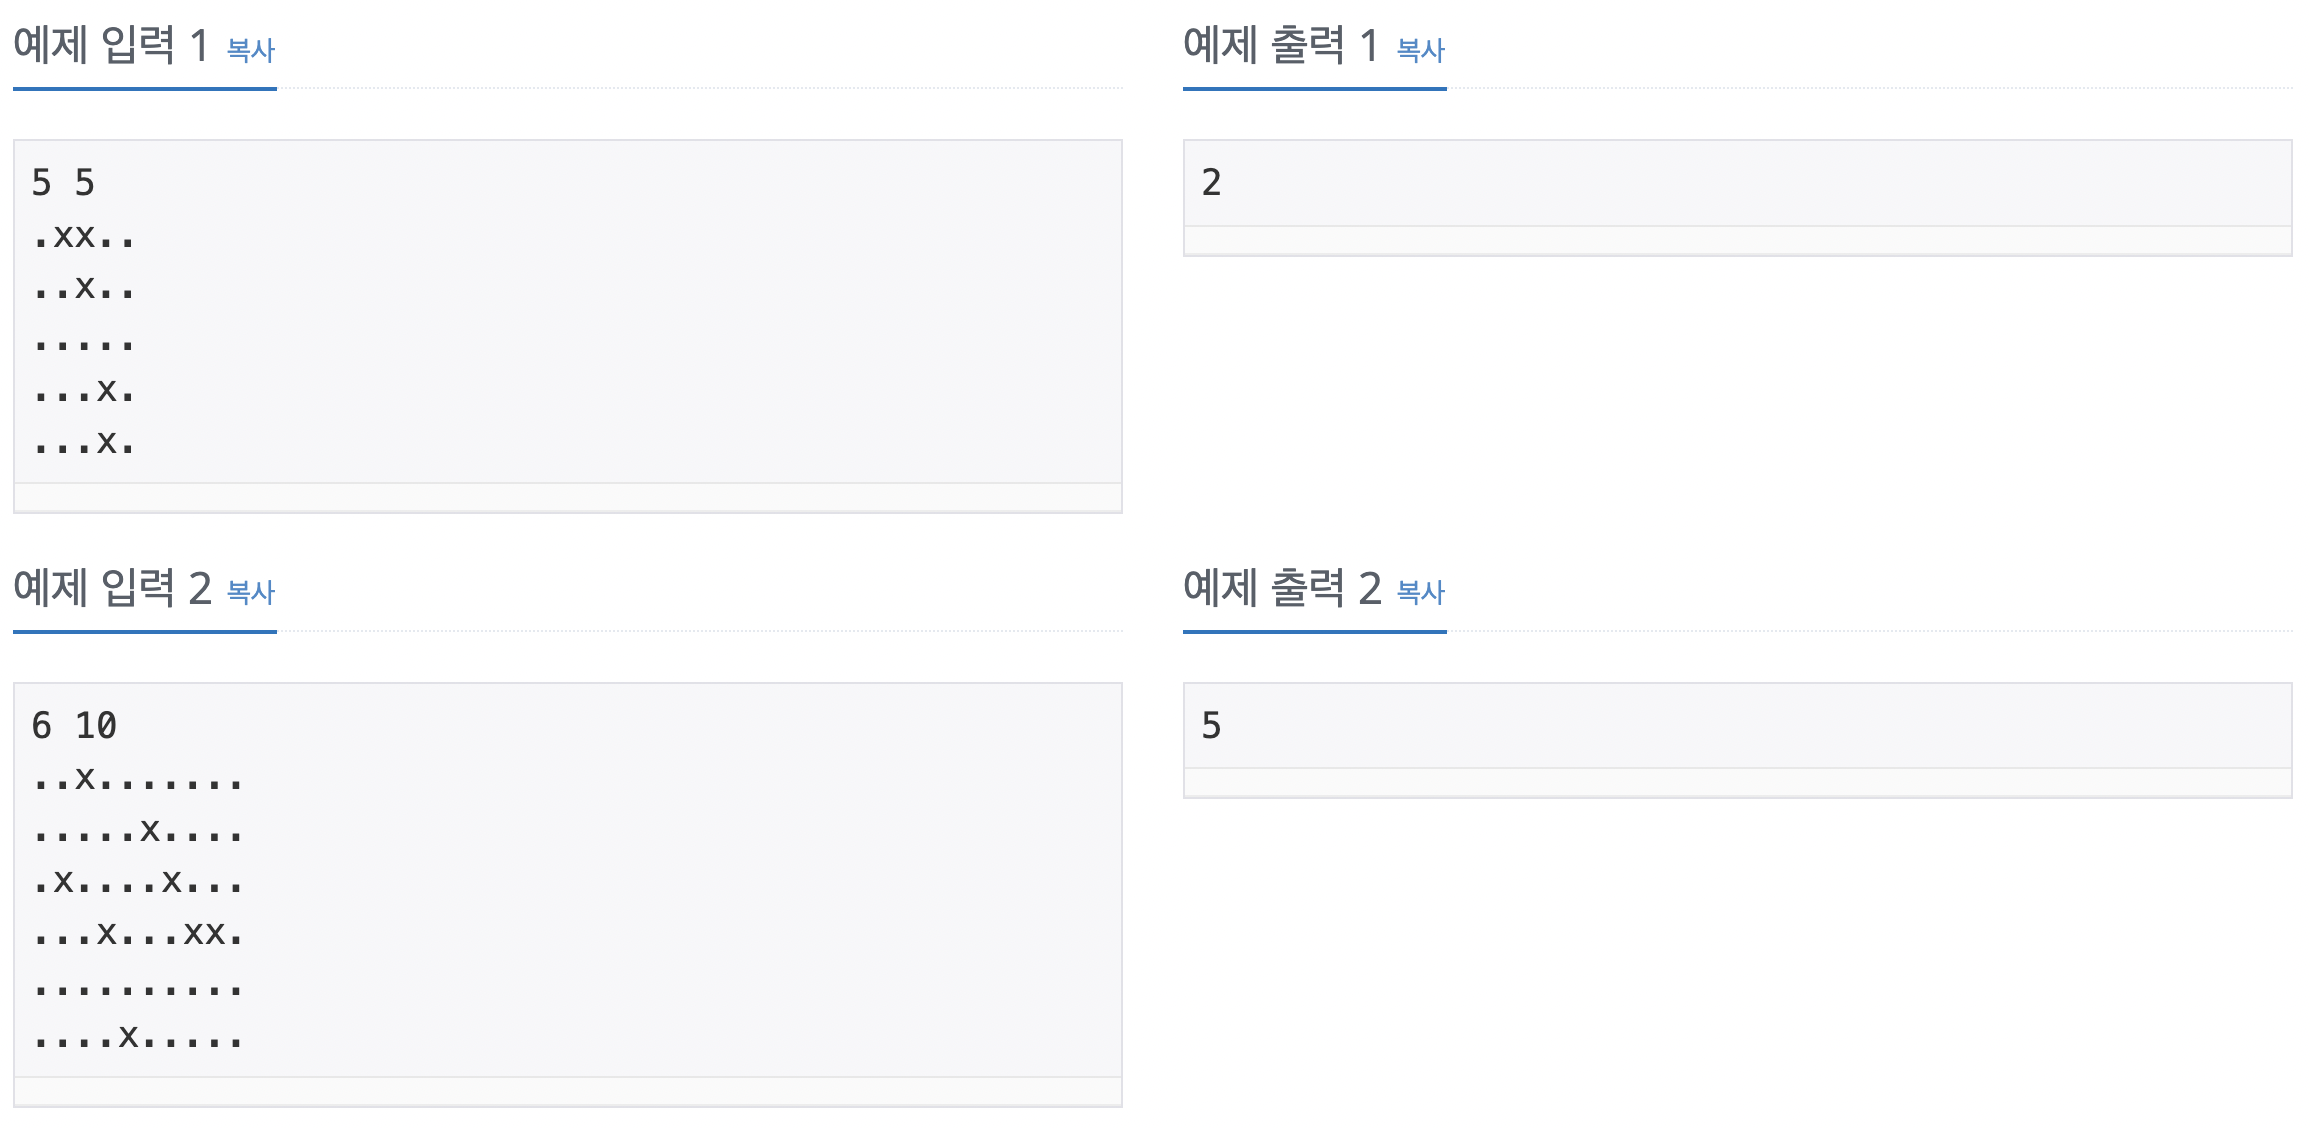

## Step
- 위의 point 부터 이어주는데, 오른쪽으로 살펴가며 움직인다. (첫 행 부터 진행)
- 오른쪽으로 살펴갈 때, 오른쪽 위, 오른쪽, 오른쪽 아래 순으로 탐색하며 이동한다.
    - 가능하다면 오른쪽 위 방향으로 움직인다는 소리

- 매칭에 성공하면 +1을 해준다.

## 실패코드

In [168]:
R, C = map(int, input().split())
graph = [[] for _ in range(R)]
for i in range(R):
    tmp = input()
    for each in tmp:
        graph[i].append(each)

def search(x):
    y = 0
    while y <= C-1:
        graph[x][y] = 'x'    # 지나온길 x로 갱신
        if y == C-1:
            return True
            

        if x == 0:
            if graph[x][y+1] == '.':
                y = y+1

            elif graph[x+1][y+1] == '.':
                x = x+1
                y = y+1

            else:
                return False
                

        elif x == R-1:
            if graph[x-1][y+1] == '.':
                x = x-1
                y = y+1

            elif graph[x][y+1] == '.':
                y = y+1

            else:
                return False
                
        else:
            if graph[x-1][y+1] == '.':
                x = x-1
                y = y+1

            elif graph[x][y+1] == '.':
                y = y+1

            elif graph[x+1][y+1] == '.':
                x = x+1
                y = y+1

            else:
                return False
                
                
res = []
for i in range(R):
    res.append(search(i))

print(sum(res))

5 5
.xx..
..x..
.....
...x.
...x.
2


## 수정 코드
- 재귀적 표현을 통해 다음 경로를 이어 찾아 나가는 방식과 그래프 표현 당시 테두리를 x로 감싸주어 예외를 줄이는 코드 추가

In [174]:
R, C = map(int, input().split())
graph = [['x'] * (C+1)]  ## 맨 윗줄 xxxxx로 감싸기
for _ in range(R):
    graph.append(['x']+list(input()))
graph.append(['x'] * (C+1))  ## 맨 아랫줄 xxxxx로 감싸기
    
def search(graph,x,y):
    if y == C:
        return True
        
    if graph[x-1][y+1] == '.':
        graph[x-1][y+1] = 'x'
        if search(graph, x-1, y+1):
            return True
        
    if graph[x][y+1] == '.':
        graph[x][y+1] = 'x'
        if search(graph, x, y+1):
            return True

    if graph[x+1][y+1] == '.':
        graph[x+1][y+1] = 'x'
        if search(graph, x+1, y+1):
            return True

    return False

res = []
for i in range(1,R+1):
    res.append(search(graph,i,1))

print(sum(res))

5 5
.xx..
..x..
.....
...x.
...x.
2


## 참고 코드
- https://velog.io/@ready2start/Python-%EB%B0%B1%EC%A4%80-3109-%EB%B9%B5%EC%A7%91

In [ ]:
from sys import stdin

def search_route(arr, row, col):
    # 마지막 행에 도착했다면 탐색 종료
    if col == c:
        return 1

    # 오른쪽 위 대각선 경로 탐색
    if arr[row - 1][col + 1] == '.':
        # 방문 표시
        arr[row - 1][col + 1] = 'x'
        # 경로가 존재한다면 탐색 종료
        if search_route(arr, row - 1, col + 1):
            return 1

    # 오른쪽 경로 탐색
    if arr[row][col + 1] == '.':
        arr[row][col + 1] = 'x'
        if search_route(arr, row, col + 1):
            return 1

    # 오른쪽 아래 대각선 경로 탐색
    if arr[row + 1][col + 1] == '.':
        arr[row + 1][col + 1] = 'x'
        if search_route(arr, row + 1, col + 1):
            return 1

    # 오른쪽 위/오른쪽/오른쪽 아래 중 어디에도 경로가 없다면 0을 반환
    return 0


r, c = map(int, stdin.readline().split())
boards = [['x'] * (c + 1)]
for _ in range(r):
    boards.append(['x'] + list(stdin.readline().rstrip()))
boards.append(['x'] * (c + 1))

count = 0

for i in range(1, r + 1):
    count += search_route(boards, i, 1)

print(count)